# Option Pricing with Cointegrated Assets 

### Notebook by [Marco Tavora](https://marcotavora.me/)

## Table of contents

1. [What is Pairs Trading?](#What-is-Pairs-Trading)
2. [Importing modules](#Importing-modules)

## What is Pairs Trading?
[[go back to the top]](#Table-of-contents)

From [Wiki](https://en.wikipedia.org/wiki/Pairs_trade):
> Pair trading is a market neutral trading strategy enabling traders to profit from virtually any market conditions: uptrend, downtrend, or sideways movement. This strategy is categorized as a statistical arbitrage and convergence trading strategy.

Consider a pair of assets $y_{1,t}$ and $y_{2,t}$ historically correlated and having some kind of underlying economic link. For example, $y_{1,t}$ and $y_{2,t}$ could be Pepsi and Coca-Cola stocks.

> When the correlation between the two securities temporarily weakens, i.e. one stock moves up while the other moves down, the pairs trade would be to short the outperforming stock and to long the underperforming one, betting that the "spread" between the two would eventually converge. 

This deviation from equilibrium within a pair can be caused:
> temporary supply/demand changes, large buy/sell orders for one security, reaction for important news about one of the companies, and so on. [...] Although the strategy does not have much downside risk, there is a scarcity of opportunities, and, for profiting, the trader must be one of the first to capitalize on the opportunity. A notable pairs trader was hedge fund Long-Term Capital Management.

## Importing modules
[[go back to the top]](#Table-of-contents)

In [1]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
np.random.seed(107)
import matplotlib.pyplot as plt
# %matplotlib inline

## Cointegrated ficticious stocks
[[go back to the top]](#Table-of-contents)

Roughly speaking, two time series are cointegrated when there is some linear combination of them which varies around a mean. 

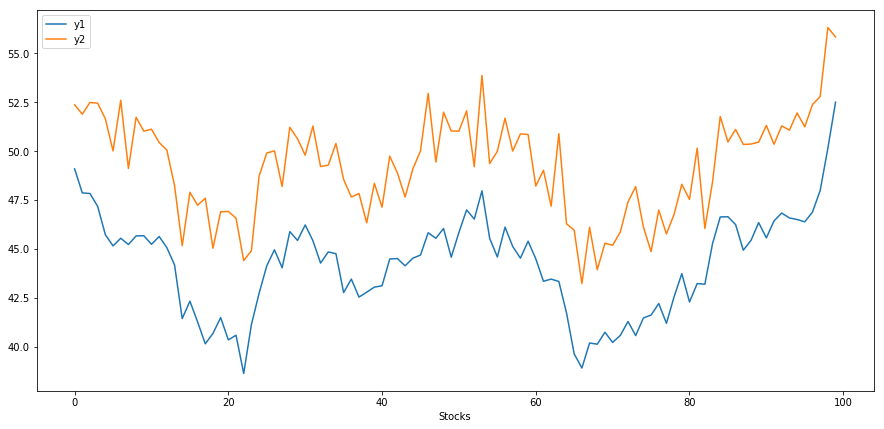

In [24]:
stocks = pd.read_csv('stocks.csv')
stocks.plot(figsize=(15,7));
plt.xlabel('Time Index')
plt.xlabel('Stocks')
plt.show();

The ratio of cointegrated pairs of series varies around a mean and pair trading works when the expectation value of the ratio converges to the mean.

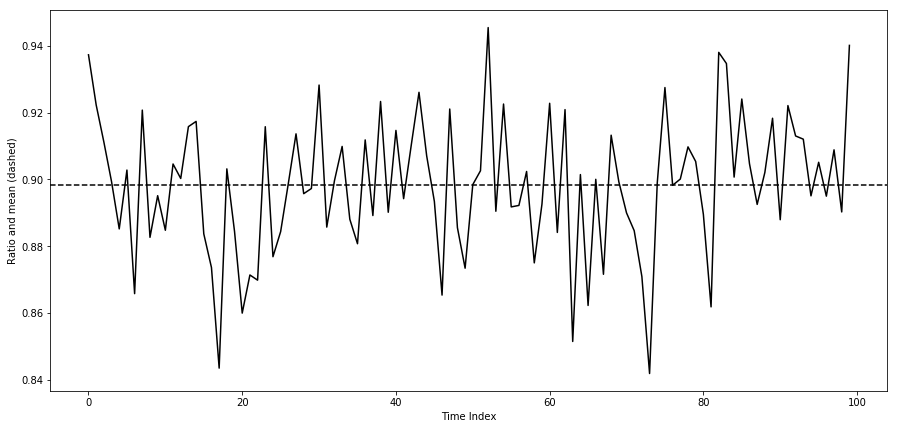

In [26]:
stocks['ratio'] = stocks['y1']/stocks['y2']
stocks['ratio'].plot(figsize=(15,7), color='black');
plt.axhline(stocks['ratio'].mean(), color='black', linestyle='--') 
plt.xlabel('Time Index')
plt.ylabel('Ratio and mean (dashed)')
plt.show();

## Cointegration tests
[[go back to the top]](#Table-of-contents)

That's an intuitive definition, but how do we test for this statistically? There is a convenient cointegration test that lives in `statsmodels.tsa.stattools`. 

`statsmodels` has a test of cointegration called `coint`. If we choose our confidence level to be $0.05$ the $p$-value from the test should be below this cutoff.

In [32]:
ci = 0.05
score, pvalue, _ = coint(stocks['y1'], stocks['y2'])
print('p-value is:',pvalue)
if pvalue < ci:
    print('The series are cointegrated.')

p-value is: 8.504226293690754e-16
The series are cointegrated.


### Correlation vs. Cointegration
Note that correlation and cointegration have similarities but are different quantities. For example, these two rather artificial series are cointegrated with zero $p$-value but have a very low correlation.

In [54]:
df = pd.read_csv('coint_vs_corr.csv', index_col=0)
df.columns = ['y1', 'y2']

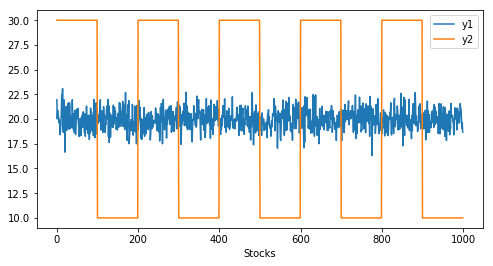

In [55]:
df.plot(figsize=(8,4));
plt.xlabel('Time Index')
plt.xlabel('Stocks')
plt.show();

In [56]:
score, pvalue, _ = coint(df['y1'],df['y2'])
print ('Cointegration test p-value: ' + str(pvalue))
print ('Correlation: ' + str(df['y1'].corr(df['y2'])))

Cointegration test p-value: 0.0
Correlation: -0.04130406958091657
